In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [6]:
story_ids = requests.get(
    "https://hacker-news.firebaseio.com/v0/topstories.json").json()
first_story_id = story_ids[0]
story_url = f"https://hacker-news.firebaseio.com/v0/item/{first_story_id}.json"
story_data = requests.get(story_url).json()
print(
    f"First story data:\nTitle: {story_data["title"]}\nPoints: {story_data["score"]}\nComments: {story_data["descendants"]}")

First story data:
Title: Heretic: Automatic censorship removal for language models
Points: 111
Comments: 27


In [ ]:
stories = []
for story_id in story_ids:
    story_url = f"https://hacker-news.firebaseio.com/v0/item/{story_id}.json"
    story_data = requests.get(story_url).json()
    stories.append({
        "Title": story_data.get("title"),
        "Points": story_data.get("score"),
        "Comments": story_data.get("descendants")
    })
print(f"\nCollected {len(stories)} stories.")


Collected 500 stories.


In [60]:
df = pd.DataFrame(stories)
print(f"Shape: {df.shape}")
print(f"RAW DATA:\n{df.head()}")
df = df[df["Title"] != " "]
df = df[df["Points"] > 0]
print(f"CLEAN DATA:\nFinal stories: {len(df)}")


Shape: (500, 3)
RAW DATA:
                                               Title  Points  Comments
0  Heretic: Automatic censorship removal for lang...     111      27.0
1                               FPGA Based IBM-PC-XT      42       5.0
2  Brimstone: ES2025 JavaScript engine written in...     124      57.0
3                                 De Bruijn Numerals      28       2.0
4           AirPods libreated from Apple's ecosystem    1055     301.0
CLEAN DATA:
Final stories: 500


In [61]:
def categorize_post(title):
    title_str = str(title).lower()
    if any(word in title_str for word in ["python", "javascript", "java", "c++", "programming", "code"]):
        return "Tech"
    elif any(word in title_str for word in ["startup", "buisness", "company", "funding", "vc"]):
        return "Buisness"
    elif any(word in title_str for word in ["ai", "artificial intelligence", "machine learning", "llm", "gpt"]):
        return "AI"
    elif any(word in title_str for word in ["meta", "amazon", "microsoft", "apple", "google"]):
        return "Big Tech"
    else:
        return "Other"

def post_type(title):
    title_str = str(title).lower()
    if "ask hn" in title_str:
        return "Ask HN"
    elif "show hn" in title_str:
        return "Show HN"
    elif "Launch hn" in title_str:
        return "Launch HN"
    else:
        return "Regular"
    
df["Category"] = df["Title"].apply(categorize_post)
df["Post Type"] = df["Title"].apply(post_type)

In [63]:
df["Engagement"] = df["Points"] + (df["Comments"] * 2)
print(f"Post Categories: {df["Category"].value_counts()}\nPost Types: {df["Post Type"].value_counts()}\nAverage Engagements: {round(df["Engagement"].mean())} ")

Post Categories: Category
Other       380
AI           71
Tech         29
Big Tech     17
Buisness      3
Name: count, dtype: int64
Post Types: Post Type
Regular    479
Show HN     19
Ask HN       2
Name: count, dtype: int64
Average Engagements: 357 


In [64]:
type_analysis = df.groupby("Post Type").agg({
    "Points": "mean",
    "Comments": "mean",
    "Engagement": "mean",
    "Title": "count"
    }).round(1)
print(f"Post Type Performance:\n{type_analysis}")


Post Type Performance:
           Points  Comments  Engagement  Title
Post Type                                     
Ask HN      233.5     676.0      1585.5      2
Regular     171.0      95.5       362.4    479
Show HN      62.3      19.1       100.4     19


In [65]:
correlation = df["Points"].corr(df["Comments"])
print(f"Points vs Comments Correlation: {round(correlation, 2)}")

Points vs Comments Correlation: 0.79


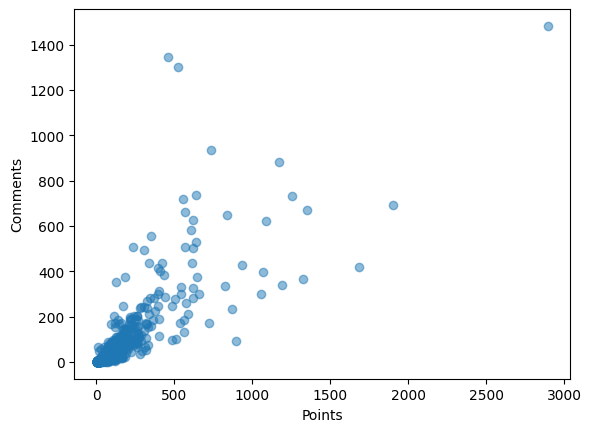

In [66]:
plt.scatter(df["Points"], df["Comments"], alpha=0.5)
plt.xlabel("Points")
plt.ylabel("Comments")
plt.show()

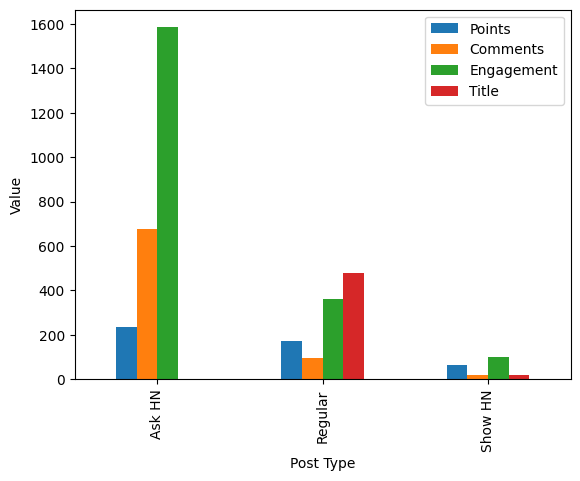

In [67]:
type_analysis.plot(kind="bar")
plt.ylabel("Value")
plt.show()

In [79]:
def success_tier(post):
    Engagement = post["Engagement"]
    if Engagement > 600:
        return "Viral"
    elif Engagement > 350:
        return "Popular"
    else:
        return "Average"
df["Success Tier"] = df.apply(success_tier, axis=1)
print(f"Success Breakdown: \n{df["Success Tier"].value_counts()}")

Success Breakdown: 
Success Tier
Average    350
Viral       82
Popular     68
Name: count, dtype: int64


In [84]:
best_type = df.groupby("Post Type")["Engagement"].mean().idxmax()
viral_count = len(df[df["Success Tier"] == "Viral"])
print(f"Key Findings:\nBest Post Type: {best_type}\nPoints/Comments Correlation: {round(correlation, 2)}\nViral Posts: {viral_count}\nTotal Stories Analyzed: {len(df)}")

Key Findings:
Best Post Type: Ask HN
Points/Comments Correlation: 0.79
Viral Posts: 82
Total Stories Analyzed: 500
